In [1]:
import numpy as np
import matplotlib.cm as cm
import pandas as pd

from possibilearn import *
from possibilearn.kernel import GaussianKernel

source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(
    filepath_or_buffer=source,
    header=None,
    sep=',')

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # drops the empty line at file-end

iris_df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
iris_values = iris_df.ix[:,0:4].values
iris_labels = iris_df.ix[:,4].values

In [3]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(iris_values)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)


iris_values_2d

array([[ -2.26454173e+00,   5.05703903e-01],
       [ -2.08642550e+00,  -6.55404729e-01],
       [ -2.36795045e+00,  -3.18477311e-01],
       [ -2.30419716e+00,  -5.75367713e-01],
       [ -2.38877749e+00,   6.74767397e-01],
       [ -2.07053681e+00,   1.51854856e+00],
       [ -2.44571134e+00,   7.45626750e-02],
       [ -2.23384186e+00,   2.47613932e-01],
       [ -2.34195768e+00,  -1.09514636e+00],
       [ -2.18867576e+00,  -4.48629048e-01],
       [ -2.16348656e+00,   1.07059558e+00],
       [ -2.32737775e+00,   1.58587455e-01],
       [ -2.22408272e+00,  -7.09118158e-01],
       [ -2.63971626e+00,  -9.38281982e-01],
       [ -2.19229151e+00,   1.88997851e+00],
       [ -2.25146521e+00,   2.72237108e+00],
       [ -2.20275048e+00,   1.51375028e+00],
       [ -2.19017916e+00,   5.14304308e-01],
       [ -1.89407429e+00,   1.43111071e+00],
       [ -2.33994907e+00,   1.15803343e+00],
       [ -1.91455639e+00,   4.30465163e-01],
       [ -2.20464540e+00,   9.52457317e-01],
       [ -

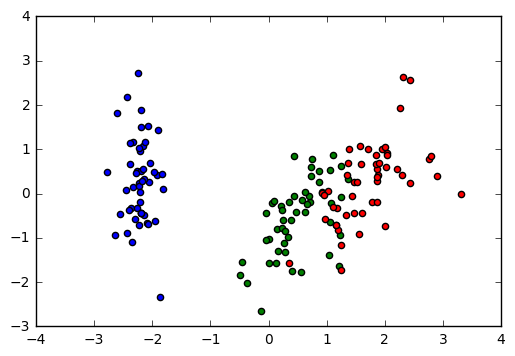

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'green', 'red')):
        plt.scatter(iris_values_2d[iris_labels==lab, 0],
                    iris_values_2d[iris_labels==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [5]:
def to_membership_values(labels, target):
    return [1 if l==target else 0 for l in labels]

mu = {}
for target in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    mu[target] = to_membership_values(iris_labels, target)

In [6]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .7, .8, .9, .95), colors='k')
    plt.clabel(membership_contour, inline=1)

def g(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

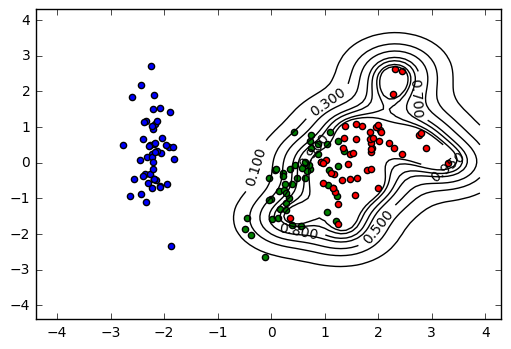

In [7]:
c_virginica = 10
sigma_virginica = .5

estimated_membership_virginica, _ = possibility_learn(iris_values_2d,
                                                      mu['Iris-virginica'],
                                                      c=c_virginica,
                                                      k=GaussianKernel(sigma_virginica),
                                                      sample_generator=g)

gr_dataset()
gr_membership_contour(estimated_membership_virginica)

plt.show()

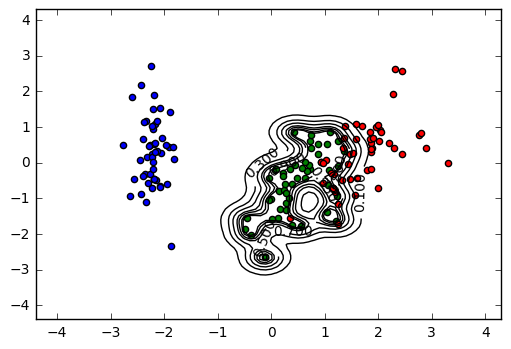

In [8]:
c_versicolor = 100
sigma_versicolor = .225

estimated_membership_versicolor, _ = possibility_learn(iris_values_2d,
                                                       mu['Iris-versicolor'],
                                                       c=c_versicolor,
                                                       k=GaussianKernel(sigma_versicolor),
                                                       sample_generator=g)

gr_dataset()
gr_membership_contour(estimated_membership_versicolor)

plt.show()

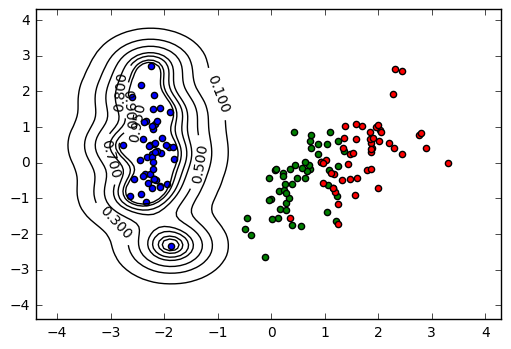

In [9]:
c_setosa = 10
sigma_setosa = .5

estimated_membership_setosa, _ = possibility_learn(iris_values_2d,
                                                       mu['Iris-setosa'],
                                                       c=c_setosa,
                                                       k=GaussianKernel(sigma_setosa),
                                                       sample_generator=g)

gr_dataset()
gr_membership_contour(estimated_membership_setosa)

plt.show()

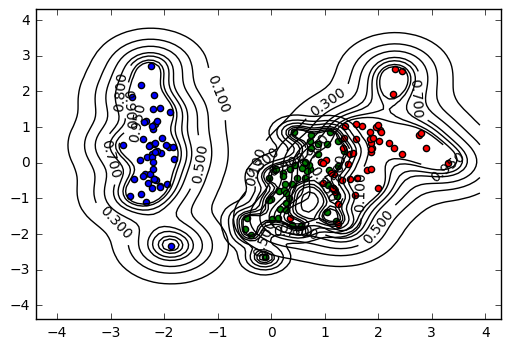

In [10]:
gr_dataset()
for e in (estimated_membership_virginica, estimated_membership_versicolor,
          estimated_membership_setosa):
    gr_membership_contour(e)

plt.show()

In [11]:
def gr_membership_graded(estimated_membership, color_map):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    plt.imshow(Z, interpolation='bilinear', origin='lower',
               cmap=color_map, alpha=0.99, extent=(-4, 4, -4, 4))

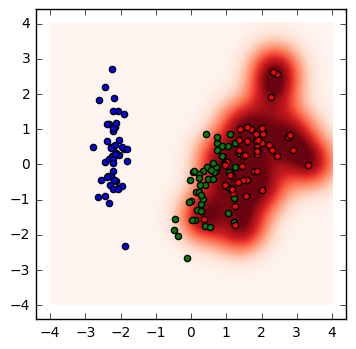

In [12]:
gr_membership_graded(estimated_membership_virginica, cm.Reds)
gr_dataset()

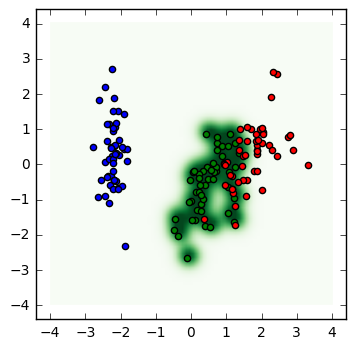

In [13]:
gr_membership_graded(estimated_membership_versicolor, cm.Greens)
gr_dataset()

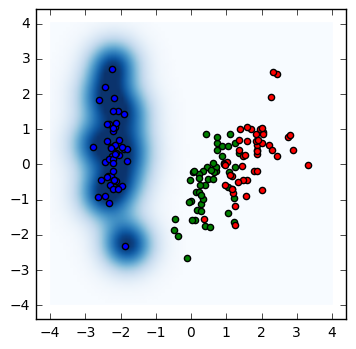

In [14]:
gr_membership_graded(estimated_membership_setosa, cm.Blues)
gr_dataset()

In [15]:
def classify(item):
    return sorted([(m(item), l)
                   for m, l in zip((estimated_membership_virginica,
                                    estimated_membership_versicolor,
                                    estimated_membership_setosa),
                              ('Iris-virginica', 'Iris-versicolor', 'Iris-setosa'))])[-1][1]

In [16]:
results = zip(range(len(iris_values_2d)), map(classify, iris_values_2d), iris_labels)

In [17]:
[r for r in results if r[1] != r[2]]

[(68, 'Iris-virginica', 'Iris-versicolor'),
 (77, 'Iris-virginica', 'Iris-versicolor'),
 (127, 'Iris-versicolor', 'Iris-virginica')]

In [18]:
def get_generator(d):
    return lambda m: (-4 + np.random.random(d*m) * 8).reshape((m, d))
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

def classify(item, est_mu, classes):
    return sorted([(l, est_mu[l](item)) for l in classes], key=lambda i:i[1], reverse=True)[0][0]

def holdout(data_values, data_labels, classes,
            train_percentage, cs, ks, generator_factory,
            classify, num_holdouts, log=True):
  
    n = len(data_values)
    
    performance_train = performance_test = 0.0
    
    trials = range(num_holdouts)
    if log:
        trials = log_progress(trials, every=1)
    
    for trial in trials:
    
        permuted_indices = np.random.permutation(n)
        train_indices = permuted_indices[:int(n*train_percentage)]
        test_indices = permuted_indices[int(n*train_percentage):]
    
        train_values = [iris_values_tr[i] for i in train_indices]
        test_values = [iris_values_tr[i] for i in test_indices]
    
        mu = {} 
        mu_train = {}
        mu_test = {}
    
        result = []
    
        for target in classes:
            mu[target] = to_membership_values(data_labels, target)
            mu_train[target] = [mu[target][i] for i in train_indices]
            mu_test[target] = [mu[target][i] for i in test_indices]
        
    
        labels_train = [data_labels[i] for i in train_indices]
        labels_test = [data_labels[i] for i in test_indices]
    
        est_mu = {}
        
        targets = classes
        if log:
            targets = log_progress(classes, every=1)
        
        for target in targets:
            est_mu[target] = model_selection(train_values, mu_train[target], cs, ks,
                                             sample_generator=generator_factory(c), log=log)[2][0]

            if len(est_mu.values()) < len(classes):
                continue # at least one class not inferred
        
        results_train = zip(range(len(train_values)),
                            map(lambda item: classify(item, est_mu, classes),
                            train_values), labels_train)   
        performance_train += 1.0 * len([r for r in results_train if r[1] != r[2]]) / len(results_train)
    
        results_test = zip(range(len(test_values)),
                           map(lambda item: classify(item, est_mu, classes),
                           test_values), labels_test)  
    
        performance_test += 1.0 * len([r for r in results_test if r[1] != r[2]]) / len(results_test)
        
    return (performance_train/num_holdouts, performance_test/num_holdouts)

In [19]:
cs = (10,)
sigmas = (.5,)

ks = map(GaussianKernel, sigmas)
classes = ('Iris-virginica', 'Iris-versicolor', 'Iris-setosa')

train_percentage = 0.7
num_holdouts = 2

results_df = pd.DataFrame()

for c in log_progress(range(2, 5), every=1):
    pca = PCA(n_components=c)
    iris_values_tr = pca.fit_transform(iris_values_std)
    
    perf_train, perf_test = holdout(iris_values_tr, iris_labels,
                                    classes, train_percentage, cs, ks,
                                    get_generator, classify, num_holdouts, log=True)
    
    results_df = results_df.append({'components': c,
                                    'train': perf_train,
                                    'test': perf_test},
                      ignore_index=True)

results_df

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


NameError: global name 'model_selection' is not defined